shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)


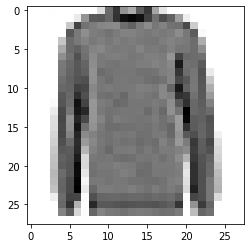

In [16]:
import tensorflow as tf
from tensorflow import keras
mnistDB=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=mnistDB.load_data()
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)
import matplotlib.pyplot as plt
plt.imshow(x_train[45],cmap='binary')



In [18]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]))
cnn.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(keras.layers.MaxPooling2D(2,2))
cnn.add(keras.layers.Dropout(0.25))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(128,activation='relu'))
cnn.add(keras.layers.Dropout(0.25))
cnn.add(keras.layers.Dense(10,activation='relu'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [3]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=1,batch_size=16)
test_loss,test_accuracy=cnn.evaluate(x_test,y_test)
print(test_loss,test_accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 2.3026 - accuracy: 0.1000
2.30259108543396 0.10000000149011612


In [19]:
'''from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
img = load_img('sample_image.png', grayscale = True, target_size = (28,28))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32')/255.0
digit = cnn.predict(img)

print(f'Digit is {digit[0]}')'''

"from keras.preprocessing.image import load_img\nfrom keras.preprocessing.image import img_to_array\nfrom keras.models import load_model\nimg = load_img('sample_image.png', grayscale = True, target_size = (28,28))\nplt.imshow(img)\nimg = img_to_array(img)\nimg = img.reshape(1,28*28)\nimg = img.astype('float32')/255.0\ndigit = cnn.predict(img)\n\nprint(f'Digit is {digit[0]}')"